In [2]:
import tensorflow as tf ### Models
import matplotlib.pyplot as plt ### Plotting Bar Chart
import numpy as np ### Maths Computations
import tensorflow_datasets as tfds 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt

In [3]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

In [4]:
def split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):

    DATA_SIZE = len(dataset)

    train_dataset = dataset.take(int(TRAIN_RATIO * DATA_SIZE))


    val_test_dataset = dataset.skip(int(TRAIN_RATIO * DATA_SIZE))
    val_dataset = val_test_dataset.take(int(VAL_RATIO*DATA_SIZE))


    test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATA_SIZE))

    return train_dataset, val_dataset, test_dataset

In [5]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

#dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = split(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator()))


[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

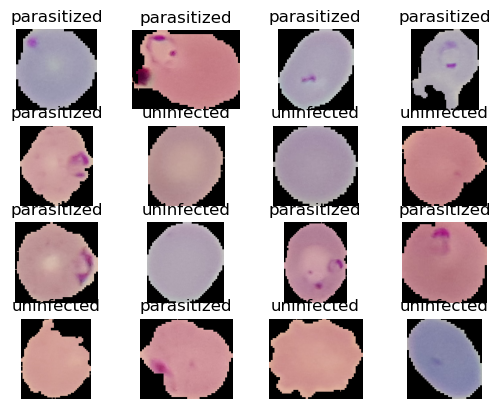

In [6]:
for i, (image, label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis('off')

In [7]:
dataset_info.features['label'].int2str(1)

'uninfected'

In [8]:
IM_SIZE = 224
def resize_rescale(image, label):
    return tf.image.resize(image,(IM_SIZE, IM_SIZE))/255.0, label

In [9]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [10]:
for image,label in train_dataset.take(1):
    print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size= 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [12]:
val_dataset =  val_dataset.shuffle(buffer_size= 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [13]:
Model = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE,IM_SIZE,3)),

    Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'relu'),
    BatchNormalization(),
    Dense(1, activation = 'sigmoid')
])
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [14]:
Model.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [15]:
history=Model.fit(train_dataset, validation_data=val_dataset,epochs=20, verbose=1)

Epoch 1/20



689/689 [==============================] - 312s 447ms/step - loss: 0.4443 - accuracy: 0.7859 - val_loss: 0.7935 - val_accuracy: 0.6737
Epoch 2/20
689/689 [==============================] - 312s 452ms/step - loss: 0.1998 - accuracy: 0.9338 - val_loss: 1.6192 - val_accuracy: 0.7532
Epoch 3/20
689/689 [==============================] - 328s 476ms/step - loss: 0.1731 - accuracy: 0.9433 - val_loss: 0.1646 - val_accuracy: 0.9492
Epoch 4/20
689/689 [==============================] - 329s 478ms/step - loss: 0.1551 - accuracy: 0.9494 - val_loss: 0.2035 - val_accuracy: 0.9412
Epoch 5/20
689/689 [==============================] - 328s 476ms/step - loss: 0.1393 - accuracy: 0.9538 - val_loss: 0.2673 - val_accuracy: 0.9350
Epoch 6/20
689/689 [==============================] - 322s 467ms/step - loss: 0.1271 - accuracy: 0.9575 - val_loss: 0.2500 - val_accuracy: 0.9445
Epoch 7/20
689/689 [==============================] - 287s 417ms/step - loss: 0.1302 - accuracy: 0.9552 - val_loss: 0.2061 - val_accura

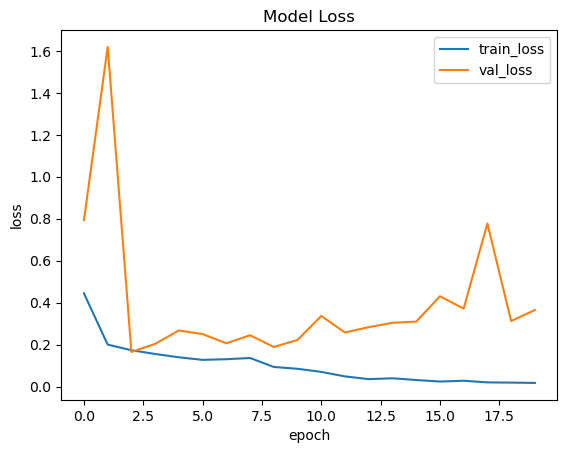

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

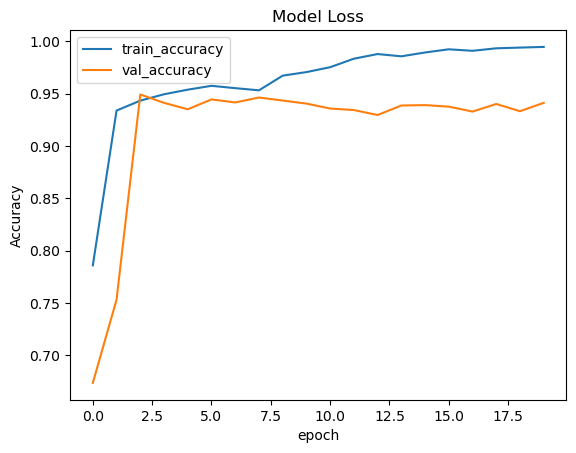

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show

In [20]:
test_dataset = test_dataset.batch(1)

In [23]:
Model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 5s 5s/step


0.99999994

In [27]:
parasite_or_Not(Model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 5s 5s/step


'Par'

In [25]:
def parasite_or_Not(x):
    if(x<0.5):
        return str('Par')
    else:
        return str('Uni')

1/1 [==============================] - 0s 26ms/step


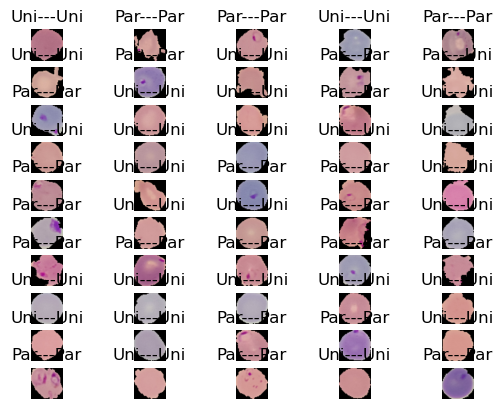

In [32]:
for i, (image, label) in enumerate (test_dataset.take(50)):

    ax = plt.subplot(10, 5, i+1)
    plt.imshow(image[0])
    plt.title(str(parasite_or_Not(label.numpy()[0])) + "---" + str(parasite_or_Not(Model.predict(image)[0][0])))
    plt.axis('off')

NameError: name 'drive' is not defined